In [5]:
import pandas as pd
import numpy as np
import random
import math
from matplotlib import pyplot as plt

In [ ]:
def population_growth_simulation(b, N0, Nf):
    if N0 > Nf:
        b = -abs(b)
    else:
        b = abs(b)
    N = np.linspace(N0,Nf,abs(Nf-N0)+1)
    y = np.random.rand(len(N)-1)
    tau = -np.log(1-y)/(b*N[:-1])
    t = np.concatenate(([0], np.cumsum(tau)))
    return t, N

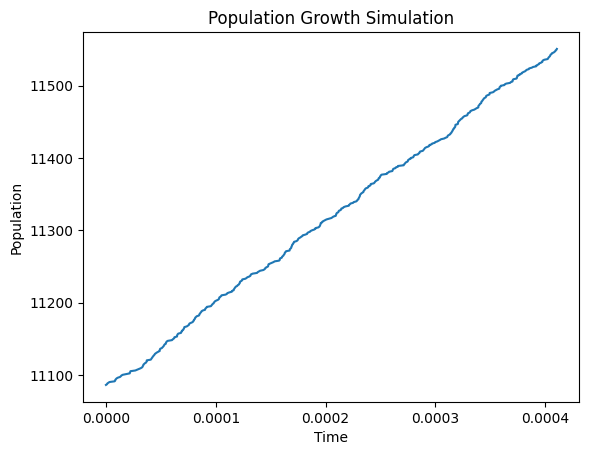

In [16]:
b=100
N0 = 11086
Nf = 11551
nreal = 1
for i in range(0, nreal):
    t, N = population_growth_simulation(b, N0, Nf)
    plt.plot(t, N)
plt.title('Population Growth Simulation')
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()
    

From here, we simulate a couple of times. Identify which points in time refer to year 2021 and 2022 then average those values.

We first compute for the birth rate per town.

Birth rate is referred to as the number of live births per 1000 population in a given period typically a year.

Bagamanoc - 128
Baras - 175
Bato - 258
Caramoran - 396
Gigmoto - 129
Pandan - 294
Panganiban - 117
San Andres - 580
San Miguel - 194
Viga - 274
Virac - 977

As for the population in 2020,
11086
13484
21748
32114
8712
21473
9713
38480
15680
22869
76520

In [26]:
births_2020 = [128, 175, 258, 396, 129, 294, 117, 580, 194, 274, 977]
pop_2020 = [11086, 13484, 21748, 32114, 8712, 21473, 9713, 38480, 15680, 22869, 76520]
pop_2023 = [11551, 12848,21279,32114,8712,20516,9713,38480,15006,21624,73650]
order = ["Bagamanoc", "Baras", "Bato","Caramoran","Gigmoto","Pandan","Panganiban","San Andres","San Miguel","Viga","Virac"]
dct = {}
for i in range(len(order)):
    dct[order[i]] = (1000*births_2020[i])/pop_2020[i]

In [31]:
fs_dct = {}
for i in range(len(order)):
    b=dct[order[i]]
    N0 = pop_2020[i]
    Nf = pop_2023[i]
    nreal = 100
    first, second = 0, 0
    for j in range(0, nreal):
        t, N = population_growth_simulation(b, N0, Nf)
        first += t[int((t.size)*0.33)]
        second += t[int((t.size)*0.66)]
    first = first/nreal
    second = second/nreal
    fs_dct[order[i]] = (first, second)

ValueError: Number of samples, -635, must be non-negative.